In [2]:
# Install libraries if not already installed
!pip install yfinance pandas matplotlib requests beautifulsoup4 --quiet

# Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

# 1. Tesla Stock Data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# 2. Tesla Revenue Data
url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_tesla = requests.get(url_tesla).text
soup_tesla = BeautifulSoup(html_tesla, "html.parser")

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup_tesla.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text
        revenue = cols[1].text.replace("$","").replace(",","")
        if revenue != "":
            tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)
tesla_revenue.dropna(inplace=True)


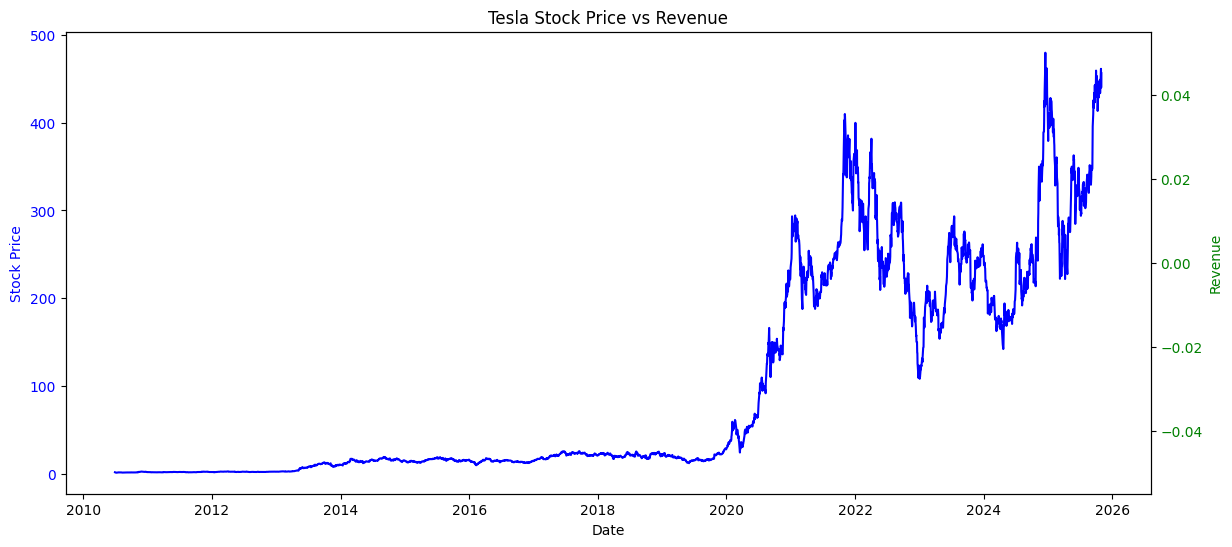

In [3]:
def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots(figsize=(14,6))

    # Stock price
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price", color="blue")
    ax1.plot(stock_data['Date'], stock_data['Close'], color="blue")
    ax1.tick_params(axis='y', labelcolor="blue")

    # Revenue
    ax2 = ax1.twinx()
    ax2.set_ylabel("Revenue", color="green")
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'].astype(float), color="green")
    ax2.tick_params(axis='y', labelcolor="green")

    plt.title(title)
    plt.show()

# Plot Tesla graph
make_graph(tesla_data, tesla_revenue, "Tesla Stock Price vs Revenue")
